### Classification with XGBoost and hyperparameter optimization

In [3]:
# import required libraries for data analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('indian_liver_patient.csv')
data.columns = data.columns.map(str.lower)
data.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
# Check data types to know if there is null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
direct_bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
alkaline_phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
alamine_aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
aspartate_aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
total_protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
albumin_and_globulin_ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


What can we see from describe & info ?

* for gender we have 2 unique values - sounds reasonable
* there seems to be extremes for several fields (compare 75% with max) - we will have to fix it
* dataset, our target variable, has 2 values
* albumin_and_globulin_ratio have some missing values those must be handled

### Fixing missing values

In [11]:
# replace missing values with mean
data.albumin_and_globulin_ratio.fillna(data.albumin_and_globulin_ratio.mean(),inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  583 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Exploratory data analysis(EDA)

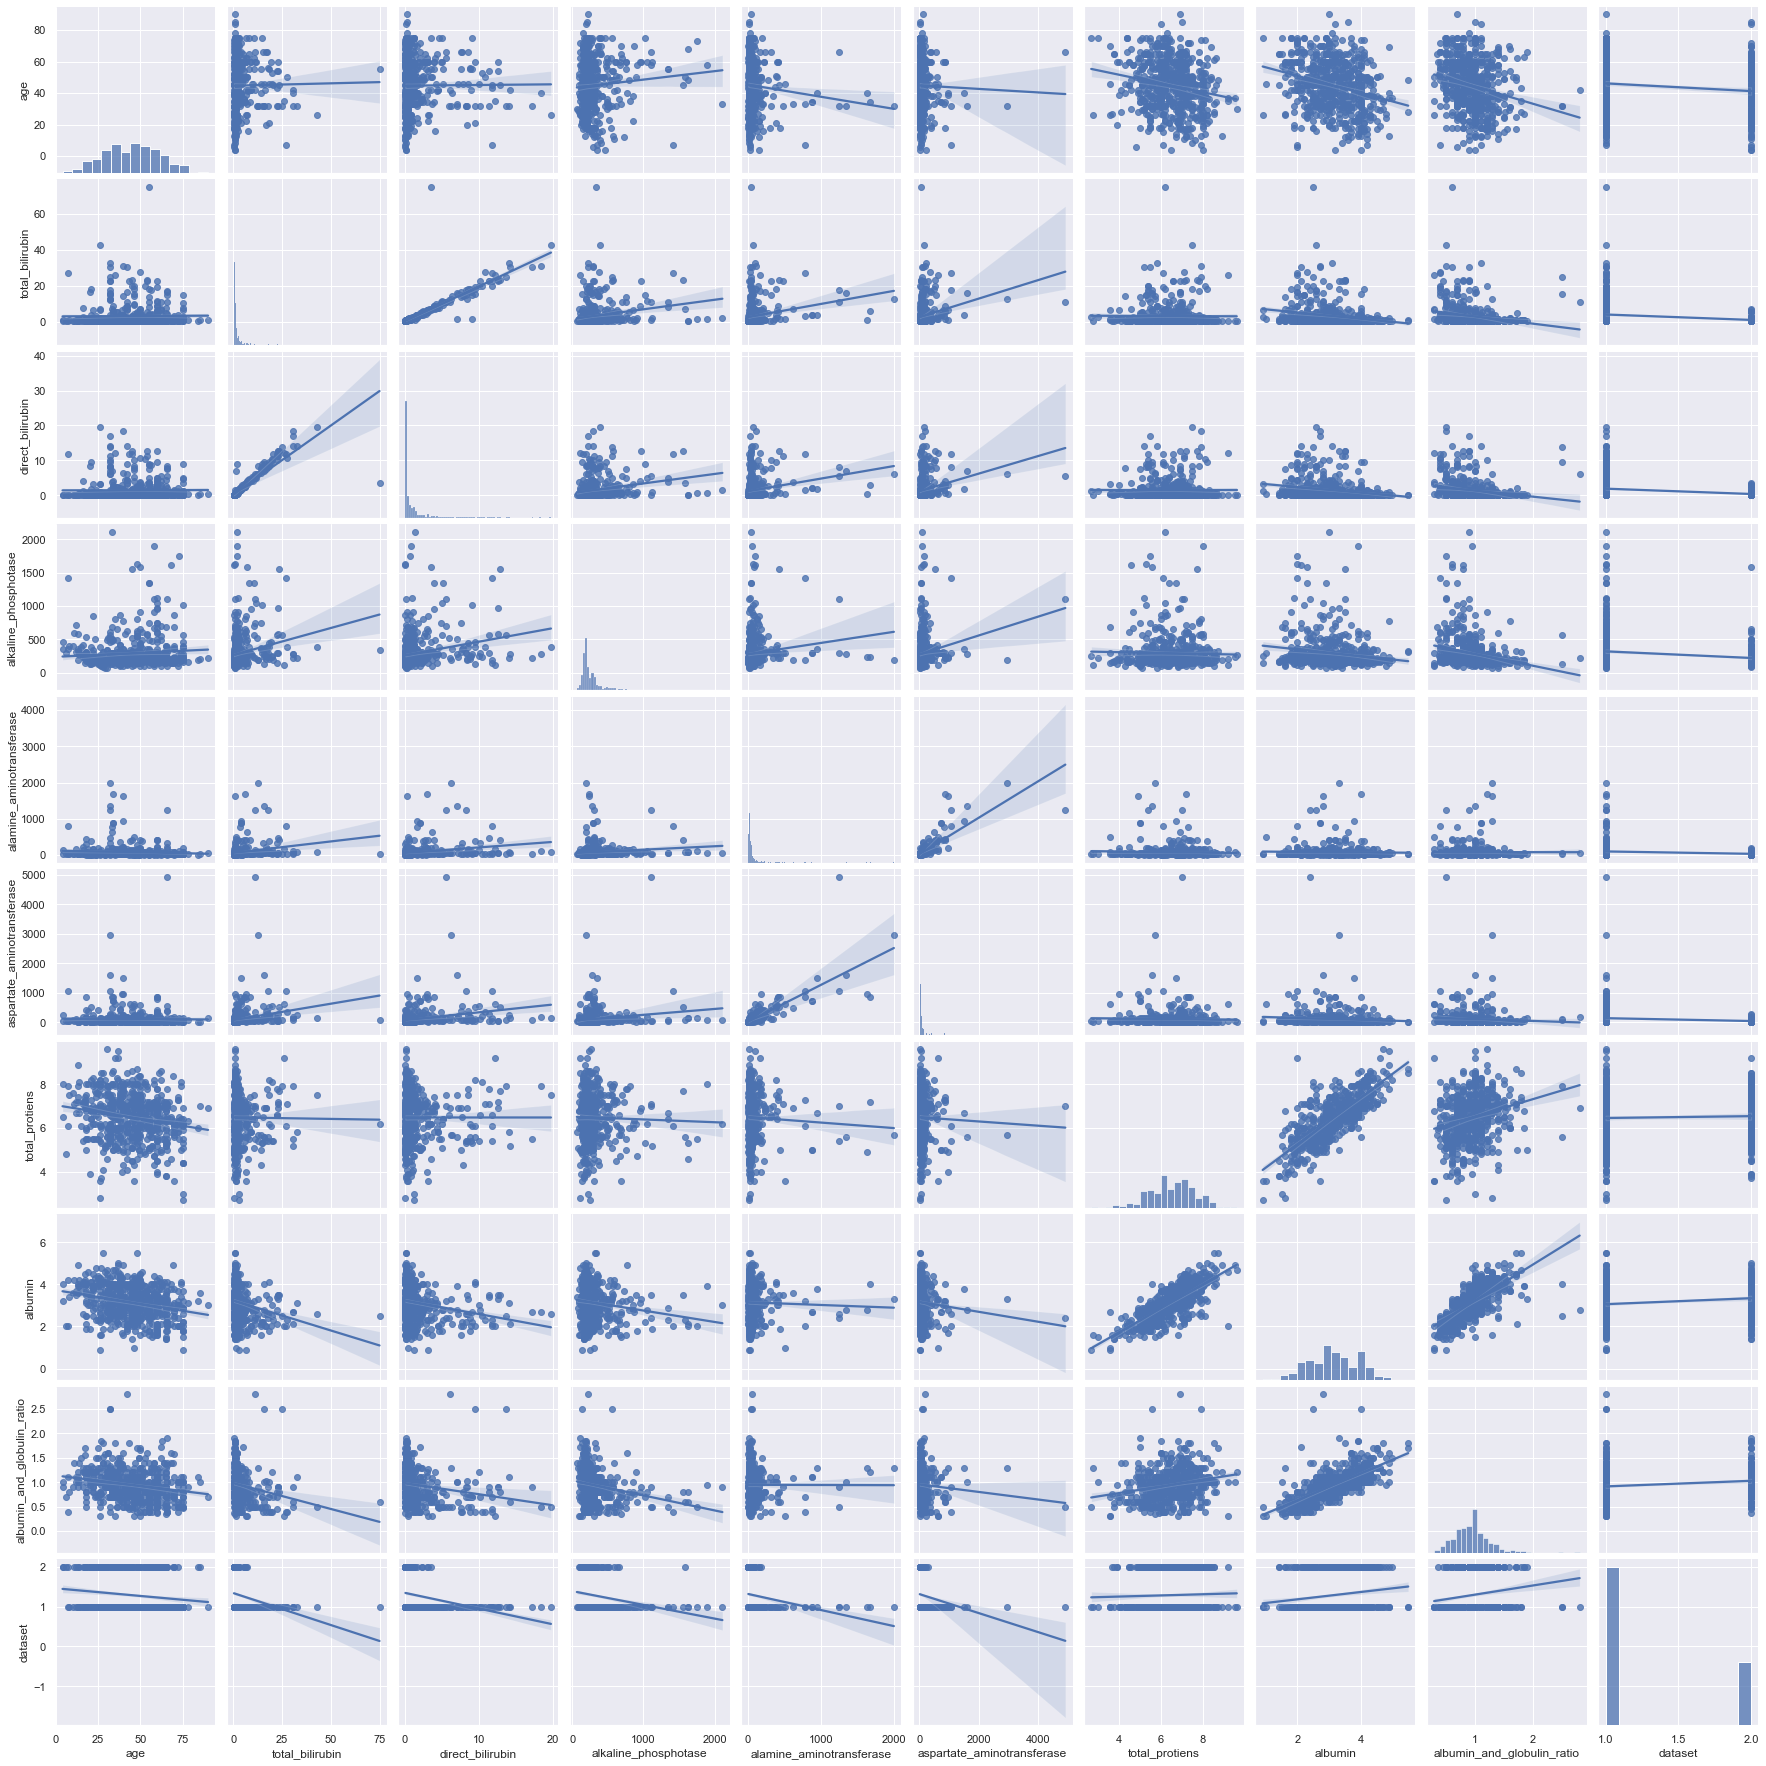

In [14]:
sns.set()
sns.pairplot(data, kind='reg')

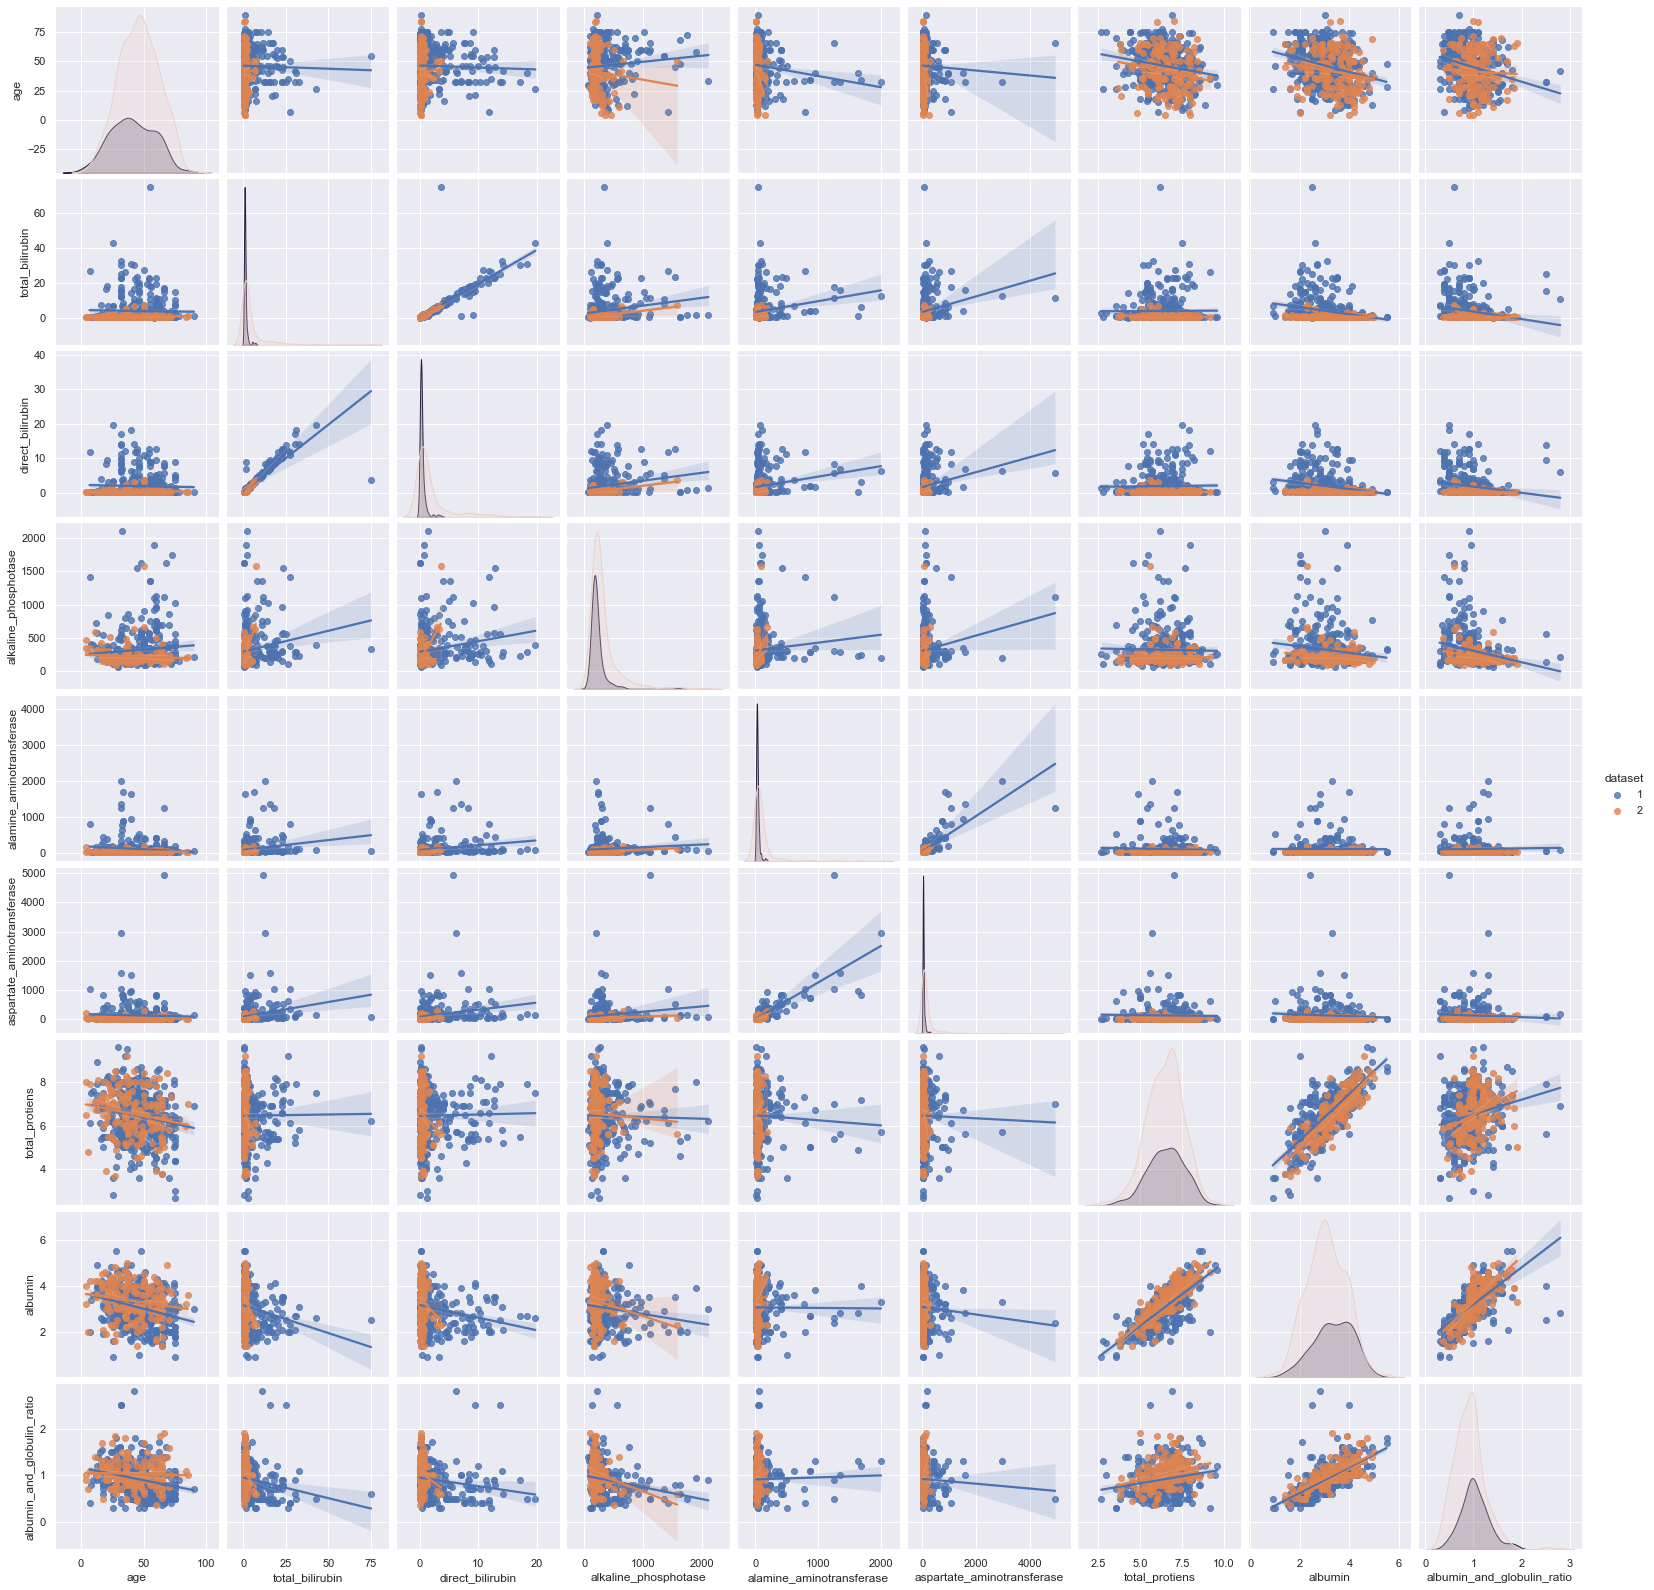

In [17]:
# correlation between variables
sns.set()
sns.pairplot(data, hue='dataset', kind='reg')

In [18]:
# correlation with datase - target value
data.corr()['dataset']

age                          -0.137351
total_bilirubin              -0.220208
direct_bilirubin             -0.246046
alkaline_phosphotase         -0.184866
alamine_aminotransferase     -0.163416
aspartate_aminotransferase   -0.151934
total_protiens                0.035008
albumin                       0.161388
albumin_and_globulin_ratio    0.162319
dataset                       1.000000
Name: dataset, dtype: float64

In [19]:
# Full correlation table
data.corr().style.background_gradient(cmap='viridis')

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
total_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
alkaline_phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
alamine_aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
aspartate_aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
total_protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
albumin_and_globulin_ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


There is strong correlation between
 
* direct_bilirubin & total_bilirubin
* aspartate_aminotransferase & alamine_aminotransferase
* total_protiens & albumin
* albumin_and_globulin_ratio & albumin

We will drop some of them as features should be independent.

In [21]:
data.drop(['direct_bilirubin', 'aspartate_aminotransferase', 'total_protiens', 'albumin'], axis=1, inplace=True)

#### Outliers and transformations

In [41]:
# outlier check
plt.figure(figsize=(15,20))

for i, c in enumerate(data.drop('dataset', axis=1).select_dtypes(include='number').columns):
    plt.rcParams['figure.dpi'] = 500
    plt.subplot(10,2, i*2+1)
    sns.boxplot(data[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


    plt.subplot(10,2, i*2+2)
    sns.boxplot(data[c], color='red')
    plt.title('Log1p distribution plot for field' +c )
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    

In [ ]:
plt.figure(figsize=(15,12

for i, c in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5,2)